In [134]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd

# TEST IRIS

In [135]:
def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

![SNOWFALL](standardization.png)

In [136]:
iris = load_iris()
X_ir = iris.data
y_ir = iris.target

In [137]:
X_ir.shape

(150, 4)

In [138]:
from my_pca import MY_PCA

In [139]:
X_pca = MY_PCA(n_components=2)

In [140]:
pca_data = X_pca.fit_transform(X_ir)

In [141]:
pca_data.shape

(150, 2)

In [142]:
test(pca_data, y_ir)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       0.73      1.00      0.85        11
           2       1.00      0.67      0.80        12

    accuracy                           0.91        45
   macro avg       0.91      0.89      0.88        45
weighted avg       0.93      0.91      0.91        45



# TEST MY DATA

In [143]:
df = pd.read_csv('../Data/balanced_sclaer_dataset_diabetes.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.isnull().sum().sum()

0

In [144]:
y = df["Diabetes_012"]
X = df.drop(["Diabetes_012"], axis=1)

In [145]:
X_pca_diab = MY_PCA(n_components=2)

In [146]:
pca_diab_data = X_pca.fit_transform(X)

In [147]:
pca_diab_data.shape

(105291, 2)

In [148]:
test(pca_diab_data, y)

              precision    recall  f1-score   support

         0.0       0.54      0.58      0.56     10470
         1.0       0.49      0.51      0.50     10507
         2.0       0.48      0.43      0.45     10611

    accuracy                           0.50     31588
   macro avg       0.50      0.50      0.50     31588
weighted avg       0.50      0.50      0.50     31588



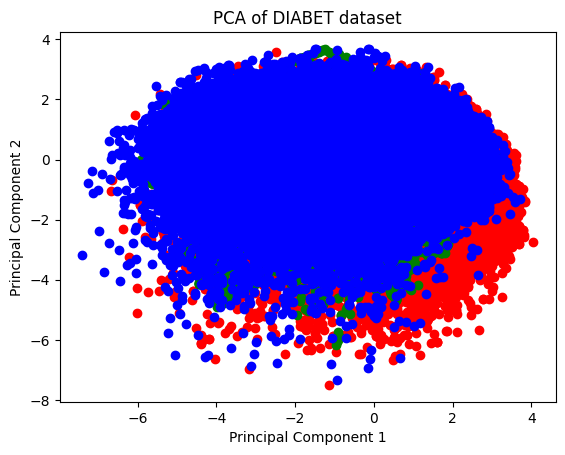

In [155]:
colors = ['red', 'green', 'blue']
for i in range(len(colors)):
    plt.scatter(
        pca_diab_data[y == i, 0], 
        pca_diab_data[y == i, 1],
        c=colors[i],
    )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of DIABET dataset')
plt.show()

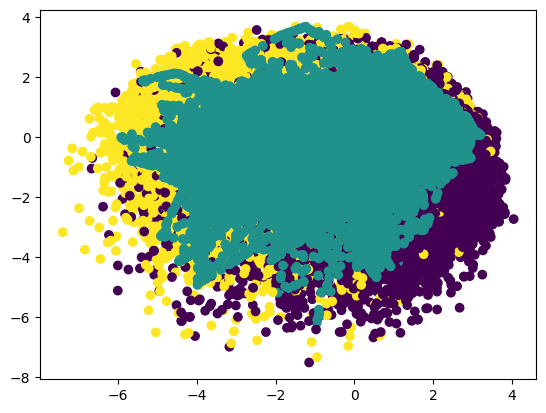

In [153]:
plt.scatter(pca_diab_data[:,0], pca_diab_data[:,1], c=y)